In [1]:
library(ggplot2)
library(gplots)
library("viridis")   
library('rjson')
library(reshape2)
library(broom)


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess


Loading required package: viridisLite



In [2]:
glycan_abd = t(read.csv('data-in/structural/paper_mcp_abundance_table.csv',row.names = 1))
rownames(glycan_abd) = gsub('^X','',rownames(glycan_abd))
motif_abd = t(t(read.csv('data-in/structural/paper_mcp_motif_abd_table.csv',row.names=1)))
samp_annot = read.csv('data-in/structural//paper_mcp_sample_annotation.csv')
var_annot = read.csv('data-in/structural//paper_mcp_variable_annotation.csv')

head(glycan_abd)
head(motif_abd)
head(samp_annot)
head(var_annot)

all(colnames(glycan_abd)==colnames(motif_abd))
all(colnames(glycan_abd)==samp_annot$Sample)

motif_vect = fromJSON(file='../unicarb_substructures.linkSpecific.merged_reference_dict_28779_2020-09-10_00_53_50.json')
motif_vect=melt(motif_vect)
head(motif_vect)

,P1TS,P1TI,P3TS,P2TS,P4TS,P4TI,P6TA_FS,P6TA_FG,P6TA_AS,P6TA_AG,P5TA_AS,P5TA_AG,P7TA_AS,P7TA_AG,P8H,P9H,P10H
384,0.200000000,2.0602903,0.0000000,1.72229021,1.478829,0.000000,3.5044604,1.3199561,0.0000000,0.000000,2.02765796,0.000000,0.000000,0.0000000,2.2940523,0.0000000,0.9421212
425_1,0.000000000,0.2002307,0.0000000,0.09552175,0.000000,0.000000,0.1593463,0.0000000,0.0000000,0.000000,0.07283916,0.000000,0.000000,0.0000000,0.0000000,0.0000000,0.1352820
425_2,0.005744057,0.0000000,0.0000000,0.00000000,0.000000,0.000000,0.0526829,0.0000000,0.0000000,0.000000,0.13150272,0.000000,0.000000,0.0000000,0.1319171,0.0000000,0.1447573
513,0.665288490,3.2947108,0.0000000,10.62497071,11.257345,0.000000,0.3080759,0.4763836,0.0000000,0.000000,12.45581407,0.000000,0.000000,0.2772022,0.8661203,1.3405621,2.1754509
530,12.541670010,8.6044105,5.2276773,3.31270949,5.993043,7.902581,2.2808420,11.6963219,11.9652210,6.578836,4.11436871,6.278508,13.208941,7.5290292,12.0219205,1.8505313,8.4560704
587_1,0.280895309,3.1717004,0.4782521,2.20448505,2.405548,1.632434,1.6922025,0.7805676,0.6827428,1.932521,9.00689343,0.000000,6.807255,0.1432739,2.1557202,0.5498721,2.2253434


,P1TS,P1TI,P3TS,P2TS,P4TS,P4TI,P6TA_FS,P6TA_FG,P6TA_AS,P6TA_AG,P5TA_AS,P5TA_AG,P7TA_AS,P7TA_AG,P8H,P9H,P10H
L26788,1.000000000,1.00000000,1.00000000,1.00000000,1.0000000,1.00000000,1.000000000,1.000000000,1.00000000,1.0000000,1.000000000,1.0000000,1.0000000,1.000000000,1.000000000,1.00000000,1.000000000
L26789,0.993095043,0.95878685,1.00000000,0.85197124,0.8774774,1.00000000,0.993105836,0.995236164,1.00000000,1.0000000,0.860319571,1.0000000,1.0000000,0.997227978,0.988816065,0.98654532,0.969127436
L26790,0.830072186,0.71110718,0.82486271,0.55391444,0.4946936,0.88999085,0.903300976,0.833381623,0.84337641,0.8765599,0.624055396,0.8916757,0.5314634,0.842213422,0.814593190,0.94908089,0.791297323
L26791,0.907004194,0.69498942,0.31885872,0.24513230,0.4952408,0.83565570,0.186740980,0.737404463,0.85957350,0.5868399,0.446719212,0.5362376,0.7166440,0.936208112,0.619862403,0.88759381,0.683621001
L26792,0.006460782,0.01055122,0.04916577,0.09428581,0.1985231,0.00000000,0.002797119,0.002937426,0.01263713,0.0000000,0.007410865,0.0000000,0.3364472,0.003896883,0.003505325,0.00000000,0.007839022
L26793,0.089295775,0.22815089,0.21265029,0.57256448,0.2472725,0.04242235,0.092482426,0.046735825,0.06757820,0.1412203,0.680860846,0.0000000,0.2152835,0.009505913,0.095467095,0.07114251,0.374128314


,Sample,Specimen,Disease,Extraction,Tissue,Subtype,Location
,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>
1,P1TS,1,Tumor,Soluble,Tumor,Tumor,
2,P1TI,1,Tumor,Insoluble,Tumor,Tumor,
3,P3TS,3,Tumor,Soluble,Tumor,Tumor,
4,P2TS,2,Tumor,Soluble,Tumor,Tumor,
5,P4TS,4,Tumor,Soluble,Tumor,Tumor,
6,P4TI,4,Tumor,Insoluble,Tumor,Tumor,


,Unnamed..0,m.z,Composition,Glycan.Structure,Name,Glycoprofiles
,<int>,<int>,<fct>,<fct>,<fct>,<fct>
1,0,384,Hex(1)HexNAc(1),RES 1b:x_dgal_HEX_x:x 2s:n_acetyl 3b:b_dgal_HEX_x:x LIN 1:1d(2+1)2n 2:1o(3+1)3d,384,"['P1TS', 'P1TI', 'P2TS', 'P4TS', 'P6TA_FS', 'P6TA_FG', 'P5TA_AS', 'P8H', 'P10H']"
2,1,425,HexNAc(2),RES 1b:x_dgal_HEX_x:x 2s:n_acetyl 3b:b_dglc_HEX_x:x 4s:n_acetyl LIN 1:1d(2+1)2n 2:1o(3+1)3d 3:3d(2+1)4n,425_1,"['P1TI', 'P2TS', 'P6TA_FS', 'P5TA_AS', 'P10H']"
3,2,425,HexNAc(2),RES 1b:x_dgal_HEX_x:x 2s:n_acetyl 3b:a_dgal_HEX_x:x 4s:n_acetyl LIN 1:1d(2+1)2n 2:1o(3+1)3d 3:3d(2+1)4n,425_2,"['P1TS', 'P6TA_FS', 'P5TA_AS', 'P8H', 'P10H']"
4,3,513,NeuAc(1)HexNAc(1),RES 1b:x_dgal_HEX_x:x 2s:n_acetyl 3b:a_dgro_dgal_NON_x:x|1:a|2:keto|3:d 4s:n_acetyl LIN 1:1d(2+1)2n 2:1o(6+2)3d 3:3d(5+1)4n,513,"['P1TS', 'P1TI', 'P2TS', 'P4TS', 'P6TA_FS', 'P6TA_FG', 'P5TA_AS', 'P7TA_AG', 'P8H', 'P9H', 'P10H']"
5,4,530,Hex(1)HexNAc(1)dHex(1),RES 1b:x_dgal_HEX_x:x 2s:n_acetyl 3b:b_dgal_HEX_x:x 4b:a_lgal_HEX_x:x|6:d LIN 1:1d(2+1)2n 2:1o(3+1)3d 3:3o(2+1)4d,530,"['P1TS', 'P1TI', 'P3TS', 'P2TS', 'P4TS', 'P4TI', 'P6TA_FS', 'P6TA_FG', 'P6TA_AS', 'P6TA_AG', 'P5TA_AS', 'P5TA_AG', 'P7TA_AS', 'P7TA_AG', 'P8H', 'P9H', 'P10H']"
6,5,587,Hex(1)HexNAc(2),RES 1b:x_dgal_HEX_x:x 2s:n_acetyl 3b:b_dgal_HEX_x:x 4b:b_dglc_HEX_x:x 5s:n_acetyl LIN 1:1d(2+1)2n 2:1o(3+1)3d 3:1o(6+1)4d 4:4d(2+1)5n,587_1,"['P1TS', 'P1TI', 'P3TS', 'P2TS', 'P4TS', 'P4TI', 'P6TA_FS', 'P6TA_FG', 'P6TA_AS', 'P6TA_AG', 'P5TA_AS', 'P7TA_AS', 'P7TA_AG', 'P8H', 'P9H', 'P10H']"


[1] TRUE

[1] TRUE

,value,L1
,<fct>,<chr>
1,L0,RES 1b:a-lgal-HEX-1:5|6:d LIN
2,L1,RES 1b:b-dgal-HEX-1:5 2s:sulfate LIN 1:1o(3+1)2n
3,L2,RES 1b:b-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n
4,L3,RES 1b:a-dman-HEX-1:5 LIN
5,L4,RES 1b:b-dman-HEX-1:5 LIN
6,L5,RES 1b:x-dgro-dgal-NON-2:6|1:a|2:keto|3:d 2s:n-acetyl LIN 1:1d(5+1)2n


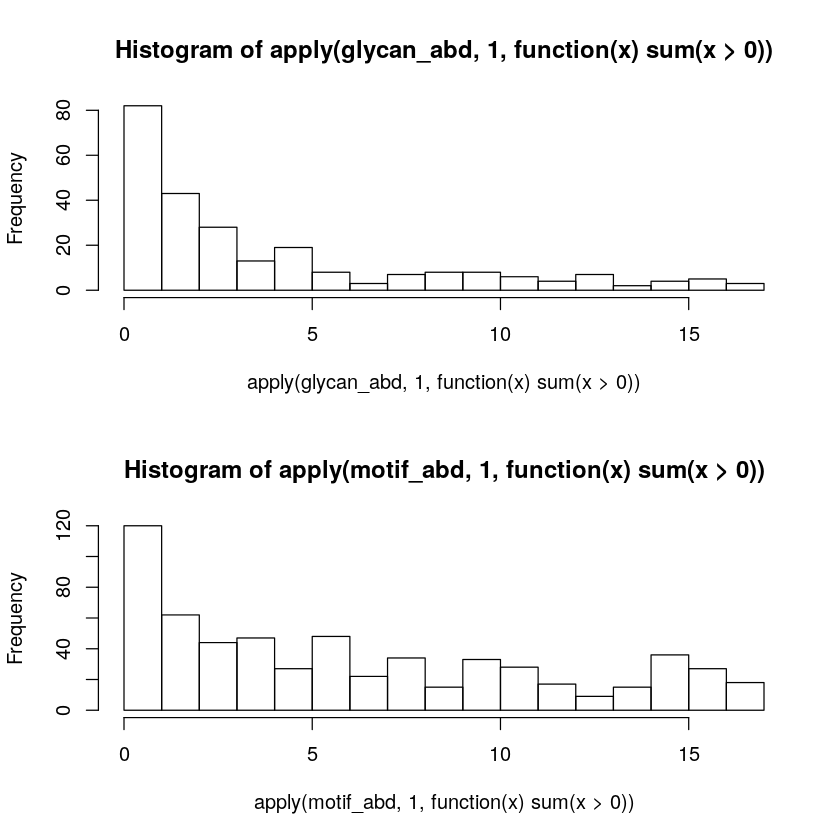

In [3]:

for(i in 1:2){
    if(i==1){pdf('results/structures_per_profile.pdf')}
    par(mfrow = c(2,1))
    hist(apply(glycan_abd,1,function(x) sum(x>0)),breaks=seq(0,17,1))
    hist(apply(motif_abd,1,function(x) sum(x>0)),breaks=seq(0,17,1))
    if(i==1){dev.off()}
}

Error in t.test.default(x[samp_annot$Disease == "Tumor"], x[samp_annot$Disease ==  : 
  data are essentially constant
Error in t.test.default(x[samp_annot$Disease == "Tumor"], x[samp_annot$Disease ==  : 
  data are essentially constant
Error in t.test.default(x[samp_annot$Disease == "Tumor"], x[samp_annot$Disease ==  : 
  data are essentially constant
Error in t.test.default(x[samp_annot$Disease == "Tumor"], x[samp_annot$Disease ==  : 
  data are essentially constant
Error in t.test.default(x[samp_annot$Disease == "Tumor"], x[samp_annot$Disease ==  : 
  data are essentially constant
"x"
"b-D-Glcx2NAc-(1-6)-[?-D-Galx-(1-?)-?-D-Glcx2NAc-(1-?)-b-D-Galx-(1-3)]?-D-Galx2NAc"
"b-D-Glcx2NAc-(1-6)-[?-L-Fucx-(1-?)-?-D-Glcx2NAc-(1-?)-b-D-Galx-(1-3)]?-D-Galx2NAc"
"b-D-Galx-(1-4)-b-D-Glcx2NAc-(1-6)-[?-L-Fucx-(1-?)-?-D-Glcx2NAc-(1-?)-b-D-Galx-(1-3)]?-D-Galx2NAc"
"b-D-Glcx2NAc-(1-6)-[?-D-Galx-(1-?)-?-D-Glcx2NAc-(1-?)-[?-D-Galx-(1-?)-?-D-Glcx2NAc-(1-?)]b-D-Galx-(1-3)]?-D-Galx2NAc"
"b-D-Glcx2NAc-(1-6)-

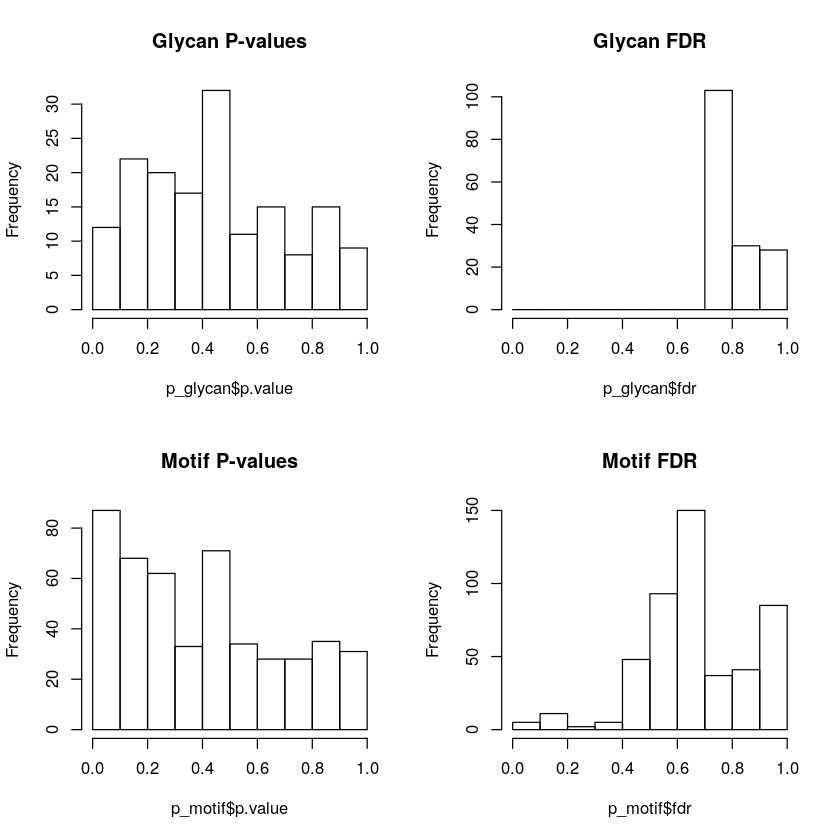

In [4]:

min_nz=1
p_glycan=as.data.frame(do.call(rbind,apply(log(glycan_abd[idx<-apply(glycan_abd,1,function(x) sum(x>0)>min_nz),]+1),1,
           function(x) tidy(t.test(x[samp_annot$Disease=='Tumor'],x[samp_annot$Disease=='Normal'])))))
rownames(p_glycan) = rownames(glycan_abd)[idx]
                                                       
p_motif=as.data.frame(do.call(rbind,apply(log(motif_abd[idx<-apply(motif_abd,1,function(x) sum(x>0)>min_nz),]+.001),1,function(x){
    out=NA
    try(out<-tidy(t.test(x[samp_annot$Disease=='Tumor'],x[samp_annot$Disease=='Normal'])))
    return(out)
    })))
rownames(p_motif) = rownames(motif_abd)[idx]

#head(p_motif)
p_glycan$fdr=p.adjust(p_glycan$p.value,'fdr')
p_motif$fdr=p.adjust(p_motif$p.value,'fdr')
                                                                
p_glycan$logFC = log2((exp(p_glycan$estimate1)-.001)/(exp(p_glycan$estimate2)-.001))
p_motif$logFC = log2((exp(p_motif$estimate1)-.001)/(exp(p_motif$estimate2)-.001))

for(i in 1:2){
    if(i==2){pdf('results/significance.pdf')}
    par(mfrow = c(2,2))
    hist(p_glycan$p.value,main='Glycan P-values',breaks=seq(0,1,.1))#,ylim=c(0,100))
    hist(p_glycan$fdr,main='Glycan FDR',breaks=seq(0,1,.1))#,ylim=c(0,150))
    hist(p_motif$p.value,main='Motif P-values',breaks=seq(0,1,.1))#,ylim=c(0,100))
    hist(p_motif$fdr,main='Motif FDR',breaks=seq(0,1,.1))#,ylim=c(0,150))
    if(i==2){dev.off()}
}
    
p_motif=na.omit(p_motif)   
sel_motifs = rownames(p_motif)[idx<-p_motif$fdr<.1]
out=cbind(p_motif[idx,c('logFC','estimate','estimate1','estimate2','statistic','p.value','fdr')],iupac=do.call(rbind,lapply(sel_motifs,function(x){
    library(reticulate)
    glypy <- import('glypy')
    glypy$io$iupac$dumps(glypy$io$glycoct$loads(motif_vect$L1[motif_vect$value==x]))
})))
write.table(out$iupac,row.names = F)
write.table(cbind(signif(out[,c('logFC','fdr','estimate1','estimate2')],3),out$iupac),row.names = F)

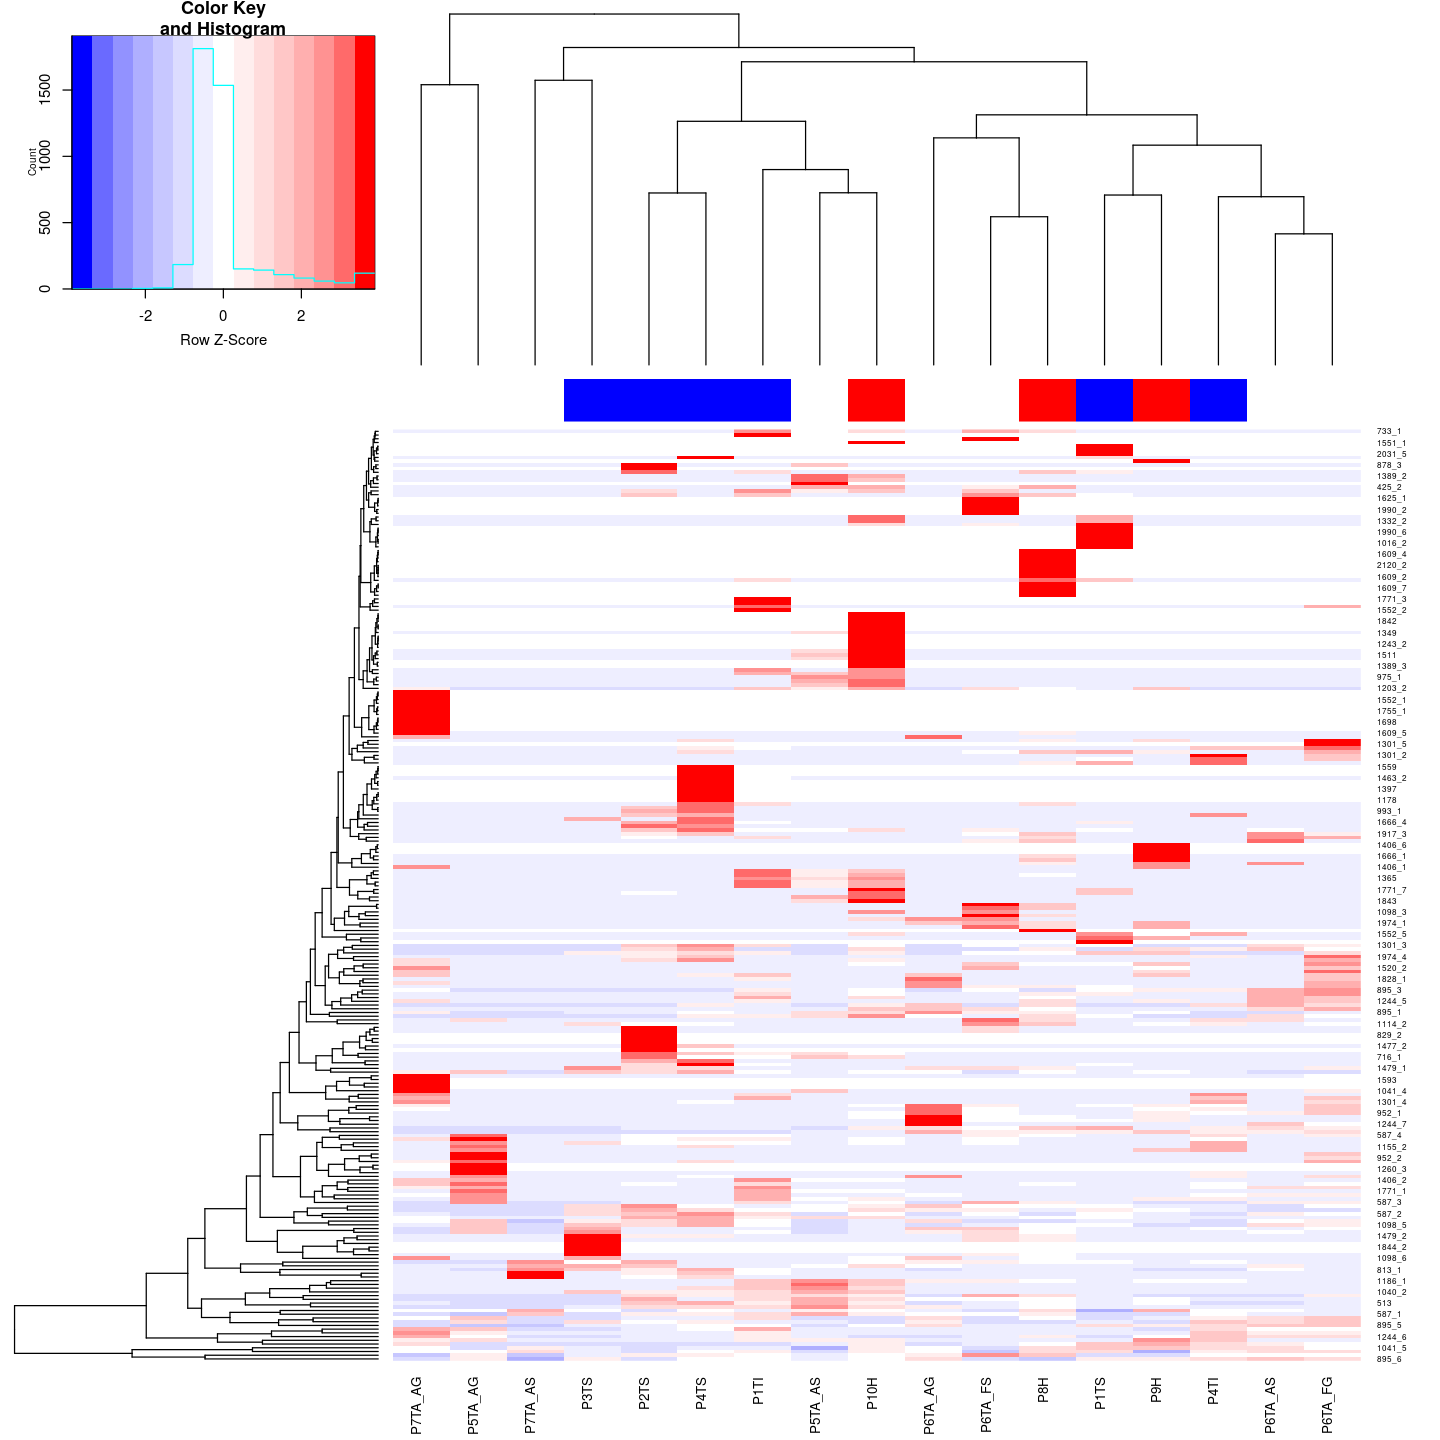

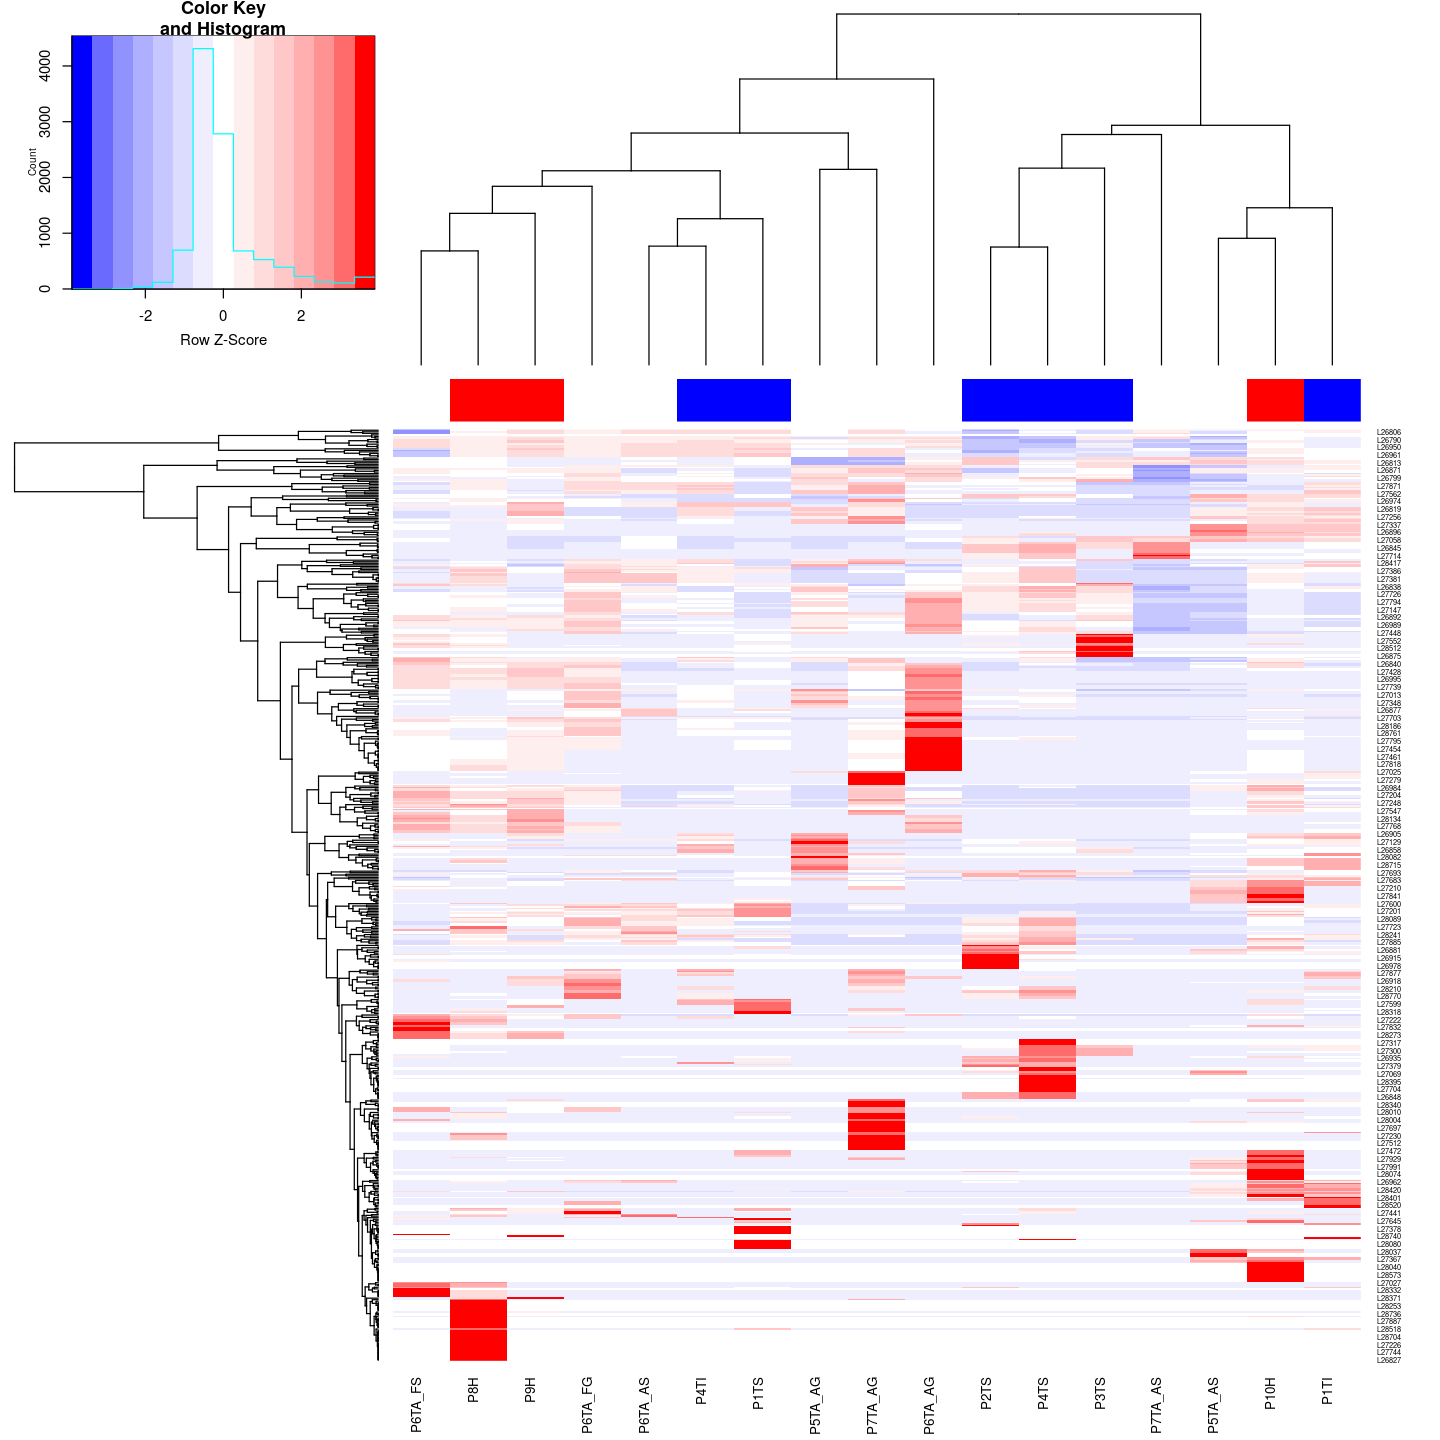

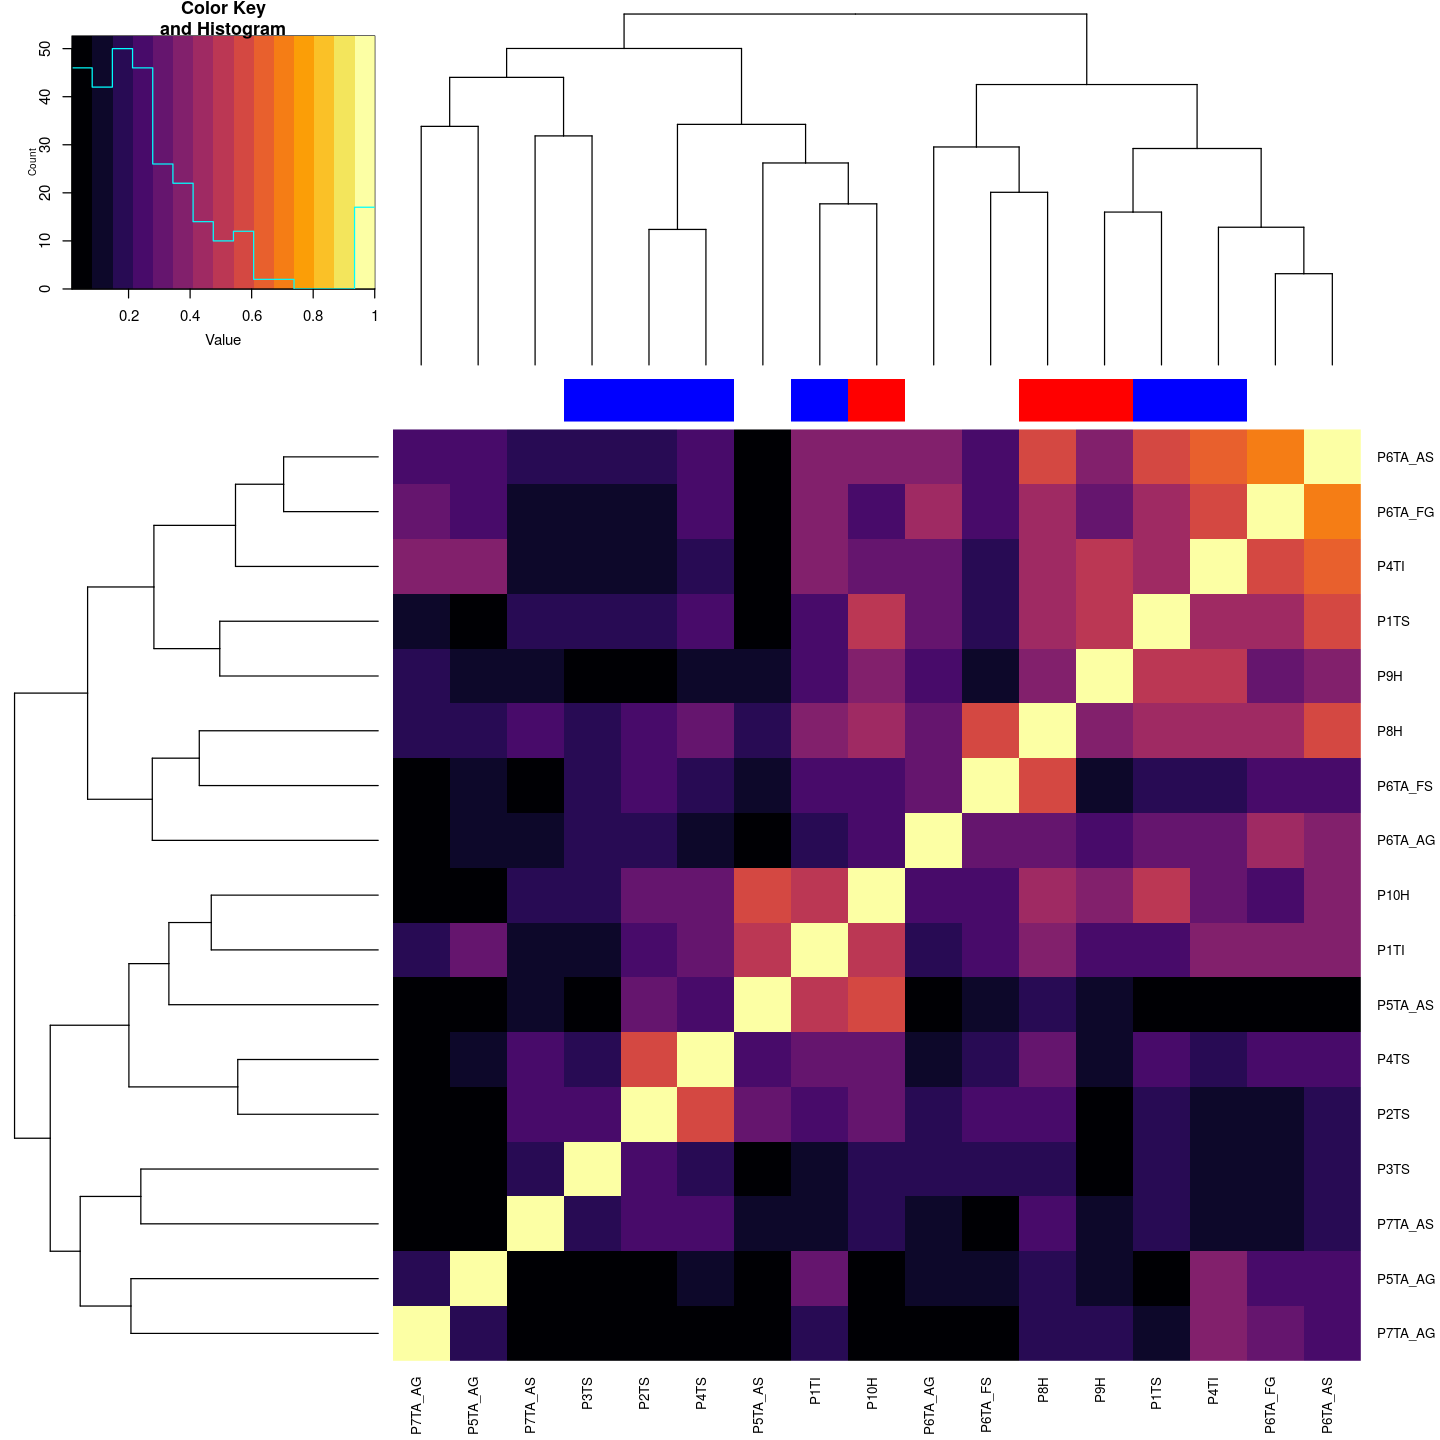

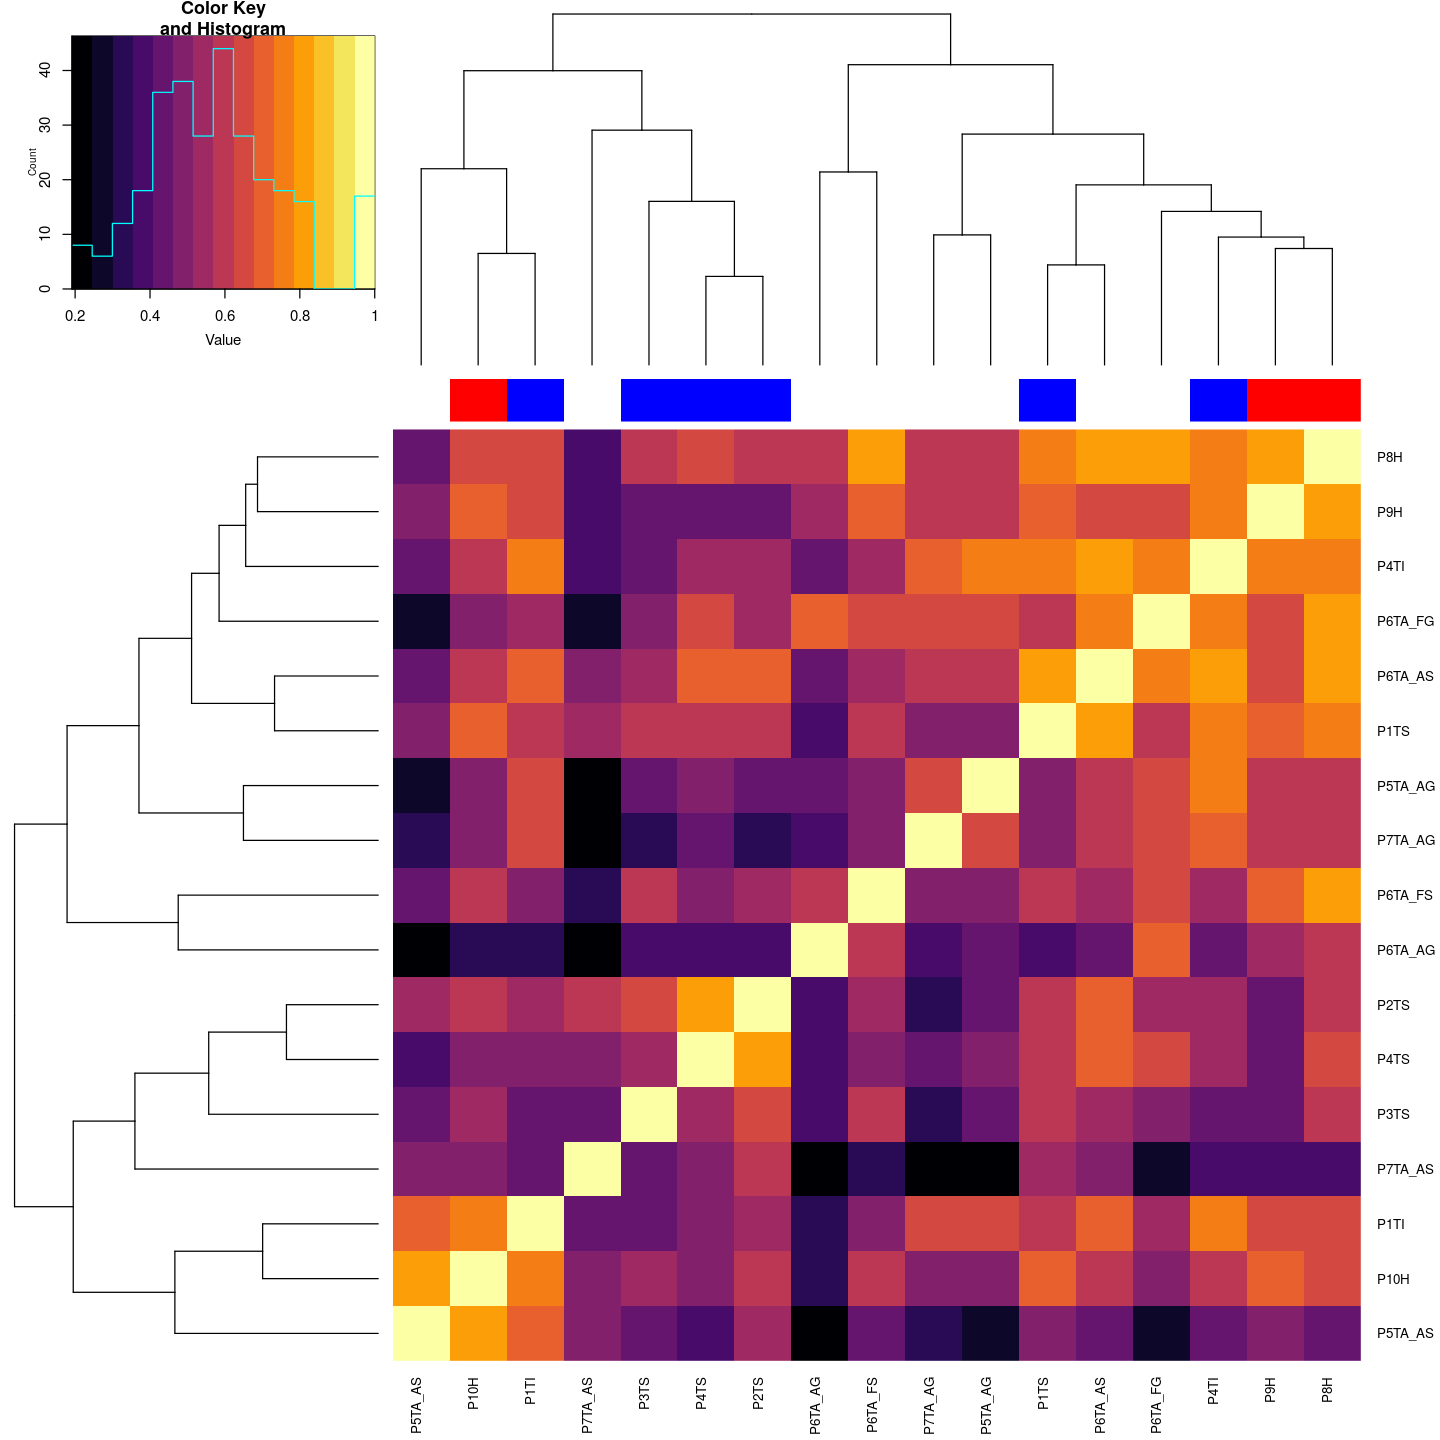

In [5]:
options(repr.plot.width=12, repr.plot.height=12)

heatmap.2(log2(glycan_abd+1),trace='none',col=colorspace::diverge_hsv,scale='row',ColSideColors = c('red','blue','white')[samp_annot$Disease])
heatmap.2(log2(motif_abd+.01),trace='none',col=colorspace::diverge_hsv,scale='row',ColSideColors = c('red','blue','white')[samp_annot$Disease])

heatmap.2(cor(log2(glycan_abd+1))^2,trace='none',col=inferno,ColSideColors = c('red','blue','white')[samp_annot$Disease])
heatmap.2(cor(log2(motif_abd+.01))^2,trace='none',col=inferno,ColSideColors = c('red','blue','white')[samp_annot$Disease])

# heatmap.2(unique(log2(glycan_abd[apply(glycan_abd,1,sum)>1,]+1)),trace='none',col=viridis,scale = 'row')
# heatmap.2(unique(log2(motif_abd[apply(motif_abd,1,sum)>.1,]+.01)),trace='none',col=viridis,scale='row')

In [6]:
samp_annot$Disease

[1] Tumor         Tumor         Tumor         Tumor         Tumor        
 [6] Tumor         TumorAdjacent TumorAdjacent TumorAdjacent TumorAdjacent
[11] TumorAdjacent TumorAdjacent TumorAdjacent TumorAdjacent Normal       
[16] Normal        Normal       
Levels: Normal Tumor TumorAdjacent